In [ ]:
# 1. Create  a model that is able to predict if a customer will make a purcase
# 2. Report what features made that model succesful
# 3. Create visual represenation of previous 2 points using graphex. 

In [ ]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sb
import sklearn as skl
import time as t
from IPython.display import display, clear_output



import json
import pickle

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 

For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [ ]:
df=pd.read_csv("/work/Sedora_Sales/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
#sns.pairplot(df[num_vars])

#### Deleting Outliers

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BounceRates'>

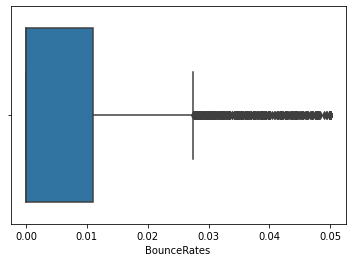

In [ ]:
df=df.drop(df.loc[df.BounceRates>0.05].index.tolist())
sns.boxplot(df["BounceRates"])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ExitRates'>

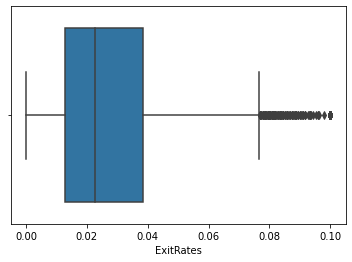

In [ ]:
df=df.drop(df.loc[df.ExitRates>0.100].index.tolist())
sns.boxplot(df["ExitRates"])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Administrative'>

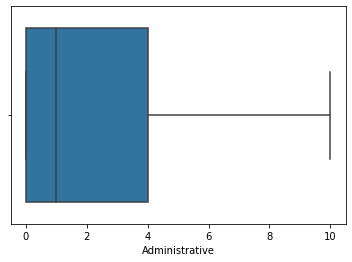

In [ ]:
df=df.drop(df.loc[df.Administrative>10].index.tolist())
sns.boxplot(df["Administrative"])


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Administrative_Duration'>

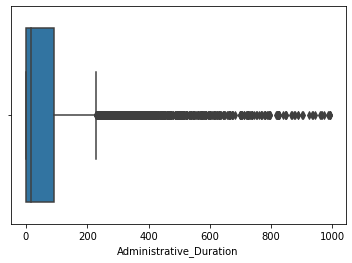

In [ ]:
df=df.drop(df.loc[df.Administrative_Duration>1000].index.tolist())
sns.boxplot(df["Administrative_Duration"])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ProductRelated'>

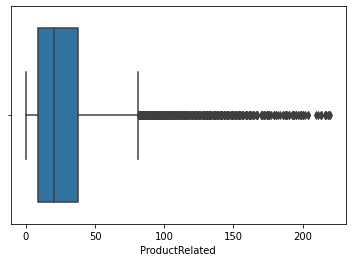

In [ ]:
df=df.drop(df.loc[df.ProductRelated>220].index.tolist())
sns.boxplot(df["ProductRelated"])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ProductRelated_Duration'>

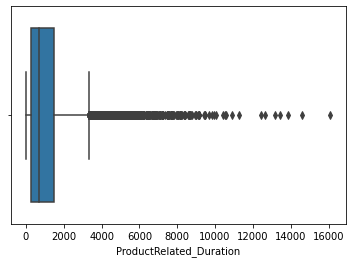

In [ ]:
df=df.drop(df.loc[df.ProductRelated_Duration>20000].index.tolist())
sns.boxplot(df["ProductRelated_Duration"])

#### Feature Engineering

#### PCA for Bounce Rates and Exit Rates

In [ ]:
#standard=StandardScaler()
df[["BounceRates","ExitRates"]]=standard.fit_transform(df[["BounceRates","ExitRates"]])

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
bounce_exit=pca.fit_transform(df[["BounceRates","ExitRates"]])
df["bounce_exit"]=bounce_exit

#Now we can delete bouncerates and exitrates
df.drop(["BounceRates","ExitRates"],axis=1)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,bounce_exit
1,0,0.0,0,0.0,2,64.000000,-0.646266,3.232064,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,1.828435
4,0,0.0,0,0.0,10,627.500000,1.126076,0.955169,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,1.471663
5,0,0.0,0,0.0,19,154.216667,0.752951,-0.203250,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,0.388697
8,0,0.0,0,0.0,2,37.000000,-0.646266,3.232064,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False,1.828435
9,0,0.0,0,0.0,3,738.000000,-0.646266,-0.309772,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False,-0.676021


#### PCA for Administrative - Administrative Duration, Informational - Informational Duration,  Product Related - Product Related Duration


In [ ]:
#df[["Administrative","Administrative_Duration"]]=standard.fit_transform(df[["Administrative","Administrative_Duration"]])
#df[["Informational","Informational_Duration"]]=standard.fit_transform(df[["Informational","Informational_Duration"]])
#df[["ProductRelated","ProductRelated_Duration"]]=standard.fit_transform(df[["ProductRelated","ProductRelated_Duration"]])

df["Administ_Dur"]= pca.fit_transform(df[["Administrative","Administrative_Duration"]])
df=df.drop(["Administrative","Administrative_Duration"],axis=1)


df["Informational_Dur"]= pca.fit_transform(df[["Informational","Informational_Duration"]])
df=df.drop(["Informational","Informational_Duration"],axis=1)

df["ProductRelated_Dur"]= pca.fit_transform(df[["ProductRelated","ProductRelated_Duration"]])
df=df.drop(["ProductRelated","ProductRelated_Duration"],axis=1)

In [ ]:
cat_vars = [ "Month","OperatingSystems",
    "Browser", "Region", "TrafficType",'VisitorType',"Weekend"]
num_vars = ["Administ_Dur","Informational_Dur","ProductRelated_Dur","bounce_exit",
    "PageValues","SpecialDay"]


#cat_vars = [ "Month","OperatingSystems",
#    "Browser", "Region",'VisitorType',"Weekend"]
#num_vars = ["Administ_Dur","Informational_Dur","ProductRelated_Dur","bounce_exit",
#    "SpecialDay"]


x=df[cat_vars+num_vars]
y=df['Revenue'].map({True:1, False:0})
len(num_vars), len(cat_vars)+1
#It must be 10 num , 8 cat

(5, 7)

In [ ]:
cat_4_tree_Models = pipeline.Pipeline(steps=[
    ('one hot', preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=45654))])


num_4_tree_Models=pipeline.Pipeline(steps=[
    (("quantile transformer",preprocessing.QuantileTransformer(n_quantiles=100, random_state=0,
    output_distribution='normal')))])



tree_prepro=compose.ColumnTransformer(transformers=[
    ("categorical",cat_4_tree_Models,cat_vars),
    ("numerical",num_4_tree_Models,num_vars)]) 

tree_prepro

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one hot',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=45654))]),
                                 ['Month', 'OperatingSystems', 'Browser',
                                  'Region', 'VisitorType', 'Weekend']),
                                ('numerical',
                                 Pipeline(steps=[('quantile transformer',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      output_distribution='normal',
                                                                      random_state=0))]),
                                 ['Administ_Dur', 'Informational_Dur',
                                  'ProductRelated_Dur', 'bounce_exit',
                                  'SpecialDay'])])

In [ ]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier



In [ ]:
# YOUR CODE HERE
tree_pipelines={
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Skl GBM": GradientBoostingClassifier(),
    "Skl HistGBM": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier() 
    }

tree_pipelines = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_pipelines.items()}

tree_pipelines["Skl GBM"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=45654))]),
                                                  ['Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'VisitorType', 'Weekend']),
                                                 ('numerical',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       output_distribution='normal',
                                                                                       random_state=0))]),
                                                  ['Administ_Dur',
                                                   'Informational_Dur',
                                                   'ProductRelated_Dur',
                                                   'bounce_exit',
                                                   'SpecialDay'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [ ]:

from sklearn.model_selection import cross_val_predict

skf = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})





for model_name, model in tree_pipelines.items():
    start_time = time.time()


        
    # TRAIN AND GET PREDICTIONS USING cross_val_predict() and x,y
    pred = cross_val_predict(model, x,y, cv=skf)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              




results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')


1:	learn: 0.6587343	total: 48.4ms	remaining: 24.2s
2:	learn: 0.6434144	total: 59.9ms	remaining: 19.9s
3:	learn: 0.6286244	total: 71.3ms	remaining: 17.7s
4:	learn: 0.6147319	total: 87.2ms	remaining: 17.4s
5:	learn: 0.6029098	total: 96.1ms	remaining: 15.9s
6:	learn: 0.5916594	total: 138ms	remaining: 19.6s
7:	learn: 0.5814013	total: 154ms	remaining: 19.1s
8:	learn: 0.5706846	total: 163ms	remaining: 18s
9:	learn: 0.5615183	total: 174ms	remaining: 17.2s
10:	learn: 0.5511726	total: 190ms	remaining: 17.1s
11:	learn: 0.5430755	total: 207ms	remaining: 17s
12:	learn: 0.5354000	total: 244ms	remaining: 18.5s
13:	learn: 0.5268692	total: 255ms	remaining: 18s
14:	learn: 0.5193550	total: 266ms	remaining: 17.5s
15:	learn: 0.5130483	total: 278ms	remaining: 17.1s
16:	learn: 0.5072466	total: 289ms	remaining: 16.7s
17:	learn: 0.5017396	total: 331ms	remaining: 18s
18:	learn: 0.4953302	total: 347ms	remaining: 17.9s
19:	learn: 0.4911581	total: 361ms	remaining: 17.7s
20:	learn: 0.4861970	total: 371ms	remaining

,Model,Accuracy,Bal Acc.,Time
1,Random Forest,83.130218,53.853780,22.861607
2,Skl GBM,83.053450,51.375881,23.363821
3,Skl HistGBM,83.053450,51.375881,23.436969
4,CatBoost,83.015066,53.509348,166.536472
5,AdaBoost,82.871126,51.679371,8.212822
6,LightGBM,82.851934,53.296703,34.493766
7,Extra Trees,82.554457,54.242250,15.590864
8,XGBoost,81.988293,54.177648,231.504472
9,Decision Tree,74.465023,55.924058,1.800274


### Mult Models

In [ ]:
cat_4_mult_Models = pipeline.Pipeline(steps=[
    ('one hot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])


num_4_mult_Models=pipeline.Pipeline(steps=[
    (("quantile transformer",preprocessing.QuantileTransformer(n_quantiles=100, random_state=0,
    output_distribution='normal')))])


mult_prepro=compose.ColumnTransformer(transformers=[
    ("categorical",cat_4_mult_Models,cat_vars),
    ("numerical",num_4_mult_Models,num_vars)]) 

mult_prepro

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one hot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Month', 'OperatingSystems', 'Browser',
                                  'Region', 'VisitorType', 'Weekend']),
                                ('numerical',
                                 Pipeline(steps=[('quantile transformer',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      output_distribution='normal',
                                                                      random_state=0))]),
                                 ['Administ_Dur', 'Informational_Dur',
                                  'ProductRelated_Dur', 'bounce_exit',
                                  'SpecialDay'])])

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
mult_pipelines={
    "SVM": svm.SVC(),
    "Logistic": LogisticRegression(max_iter=500),
    "KNN":KNeighborsClassifier(n_neighbors=3),
    "MLP":MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)}

mult_pipelines = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_pipelines.items()}

mult_pipelines["SVM"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'VisitorType', 'Weekend']),
                                                 ('numerical',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       output_distribution='normal',
                                                                                       random_state=0))]),
                                                  ['Administ_Dur',
                                                   'Informational_Dur',
                                                   'ProductRelated_Dur',
                                                   'bounce_exit',
                                                   'SpecialDay'])])),
                ('svc', SVC())])

In [ ]:

from sklearn.model_selection import cross_val_predict

skf = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in mult_pipelines.items():
    start_time = time.time()

    #x=x.to_numpy()
    #y=y.to_numpy() 
    pred = cross_val_predict(model, x,y, cv=skf)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              

results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (

,Model,Accuracy,Bal Acc.,Time
1,SVM,83.283754,50.000000,88.242922
2,MLP,83.120622,51.966807,37.503534
3,Logistic,83.082238,51.393164,11.528562
4,KNN,79.560503,54.807793,11.152955


#### Feature Importance

The values towards the top are the most important features and those towards the bottom matter least.

The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).

Like most things in data science, there is some randomness to the exact performance change from shuffling a column. We measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles. The number after the ± measures how performance varied from one-reshuffling to the next.

You'll occasionally see negative values for permutation importances. In those cases, the predictions on the shuffled (or noisy) data happened to be more accurate than the real data. This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. This is more common with small datasets, like the one in this example, because there is more room for luck/chance.

In [ ]:
#I got you stephan! :) 
from sklearn.inspection import permutation_importance
r = permutation_importance(tree_pipelines["Skl GBM"].fit(x,y), x, y,
                        n_repeats=30,
                        random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

TrafficType0.009 +/- 0.001
VisitorType0.006 +/- 0.001
BounceRates0.005 +/- 0.001
Browser 0.004 +/- 0.001
Region  0.002 +/- 0.000
Month   0.002 +/- 0.000
SpecialDay0.001 +/- 0.000
PageValues0.001 +/- 0.000
ExitRates0.001 +/- 0.000


#### Bayessian Optimization

In [ ]:
import optuna
import sklearn
def objective(trial):

    skf = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

    tree_prepro.fit_transform(x)

    n_estimators = trial.suggest_int('n_estimators', 2, 20)

    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
    clf=pipeline.make_pipeline(tree_prepro, GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth))


    return sklearn.model_selection.cross_val_score(clf, x, y, cv=skf).mean()



In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-05-14 13:10:11,247] A new study created in memory with name: no-name-6e08706c-88df-44f7-aaad-9b40688e3e5e
[I 2021-05-14 13:10:18,951] Trial 0 finished with value: 0.8313026427899736 and parameters: {'n_estimators': 10, 'max_depth': 8.25537177762103}. Best is trial 0 with value: 0.8313026427899736.
[I 2021-05-14 13:10:24,647] Trial 1 finished with value: 0.8319740597677967 and parameters: {'n_estimators': 13, 'max_depth': 5.877739127976683}. Best is trial 1 with value: 0.8319740597677967.
[I 2021-05-14 13:10:26,029] Trial 2 finished with value: 0.8328375993507582 and parameters: {'n_estimators': 4, 'max_depth': 1.4254721607939722}. Best is trial 2 with value: 0.8328375993507582.
[I 2021-05-14 13:10:28,055] Trial 3 finished with value: 0.8328375993507582 and parameters: {'n_estimators': 11, 'max_depth': 1.956635295396592}. Best is trial 2 with value: 0.8328375993507582.
[I 2021-05-14 13:10:34,328] Trial 4 finished with value: 0.8318781824907113 and parameters: {'n_estimators': 4,

In [ ]:
study.best_params

{'n_estimators': 12, 'max_depth': 4.286268303042684}

In [ ]:
clf=pipeline.make_pipeline(tree_prepro, GradientBoostingClassifier(n_estimators=12, max_depth=4.286268303042684))

In [ ]:
### POSSIBLE SOLUTION TO CLASS IMBALNCE
## No idea hows it's working but the resampled provides equal amount of 0/1 classes
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)
print(y.describe())
print(y_resampled.describe())
balanced_pipe = pipeline.make_pipeline(tree_prepro, GradientBoostingClassifier())
imbalanced_pipe = pipeline.make_pipeline(tree_prepro, GradientBoostingClassifier())
XR_train, XR_val, YR_train, YR_val = model_selection.train_test_split(x_resampled, y_resampled)
XX_train, XX_val, YY_train, YY_val = model_selection.train_test_split(x, y)
balanced_pipe.fit(XR_train, YR_train)
imbalanced_pipe.fit(XX_train, YY_train)

count    10421.000000
mean         0.167162
std          0.373139
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Revenue, dtype: float64
count    17358.000000
mean         0.500000
std          0.500014
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: Revenue, dtype: float64


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=45654))]),
                                                  ['Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'VisitorType', 'Weekend']),
                                                 ('numerical',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       output_distribution='normal',
                                                                                       random_state=0))]),
                                                  ['Administ_Dur',
                                                   'Informational_Dur',
                                                   'ProductRelated_Dur',
                                                   'bounce_exit',
                                                   'SpecialDay'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [ ]:
RSpred = balanced_pipe.predict(XR_val)
RSacc = metrics.accuracy_score(YR_val, RSpred)
RSbacc = metrics.balanced_accuracy_score(YR_val, RSpred)
print(RSacc, RSbacc)
display(confusion_matrix(YR_val, RSpred))
USpred = imbalanced_pipe.predict(XX_val)
USacc = metrics.accuracy_score(YY_val, USpred)
USbacc = metrics.balanced_accuracy_score(YY_val, USpred)
print(USacc, USbacc)

display(confusion_matrix(YY_val, USpred))

0.669815668202765 0.6693713434302742


array([[1215,  946],
       [ 487, 1692]])

0.8403683806600154 0.5216160986085255


array([[2169,   14],
       [ 402,   21]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(YR_val, pred)

ValueError: Found input variables with inconsistent numbers of samples: [4340, 10421]

In [ ]:
pred

array([0, 0, 0, ..., 0, 0, 0])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ae2d5407-15eb-472e-9a2e-ceb75c9fcac0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>